In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'Housing.csv'

data = pd.read_csv(path)
index = [i for i in range(data.shape[0])]
np.random.shuffle(index)
data = data.set_index([index]).sort_index()
y = data["PRICE"]
X = data[data.columns.difference(['PRICE'])]
# display(X.describe())
k = 5
X -= X.mean(axis=0, skipna = True)
y -= y.mean()
X_shuffled = {}
y_shuffled = {}
rmse_train = []
rmse_test = []
for i in range(0,k):
    X_shuffled[i] = X[i::k]
    y_shuffled[i] = y[i::k]

In [313]:
def get_next_train_valid(X_shuffled, y_shuffled, itr):
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    X_valid = pd.DataFrame()
    y_valid = pd.DataFrame()
    for i in range(0,k):
        if i != itr:
            X_train = X_train.append(X_shuffled.get(i))
            y_train = pd.concat([y_train, y_shuffled.get(i)])
        else:
            X_valid = X_shuffled.get(i)
            y_valid = y_shuffled.get(i)
    return X_train, y_train, X_valid, y_valid

In [314]:
def train(X_train, y_train, vlambda):
    C = np.dot(X_train.transpose(), X_train) + vlambda*np.matrix(np.identity(np.shape(X_train)[1]))
    model_weights = np.dot(np.dot(np.linalg.inv(C),X_train.transpose()),y_train)
    model_intercept = y_train.mean()
    return model_weights, model_intercept

In [315]:
def predict(X_valid, model_weights, model_intercept):
    y_predict = np.dot(X_valid,model_weights) + model_intercept[0]
    return y_predict

In [316]:
def RMSE():
    for vlambda in range(0,100):
        splitData(k);
        cur_rmse_train = 0
        cur_rmse_test = 0
        for i in range(0,k):
            X_train, y_train, X_valid, y_valid = get_next_train_valid(X_shuffled, y_shuffled, i)
            model_weights, model_intercept = train(X_train, y_train, vlambda)
            y_predict = predict(X_valid, model_weights, model_intercept)
            cur_rmse_train += np.sqrt(((pd.DataFrame(y_predict.flatten().transpose()).values - y_valid.values)**2).mean())
            cur_rmse_test += np.sqrt(((pd.DataFrame(predict(X_train, model_weights, model_intercept).flatten().transpose()).values - y_train.values)**2).mean())
        rmse_train.append(cur_rmse_train/k);
        rmse_test.append(cur_rmse_test/k);


In [317]:
RMSE()

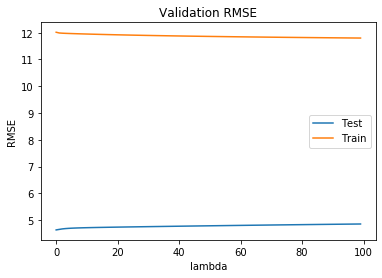

In [318]:
plt.clf()
plt.plot(rmse_test,label="Test")
plt.plot(rmse_train,label="Train")
plt.title("Validation RMSE")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.legend()

In [263]:
print('rmse train values')
print(rmse_train)


rmse train values
[12.08253508973215, 12.053010369660944, 12.043338869821849, 12.037155408094485, 12.032101988548359, 12.027570483300488, 12.023347048422162, 12.019338929086487, 12.01549883148338, 12.01179923056582, 12.008222262360022, 12.004755271614297, 12.001388661587946, 11.998114771152174, 11.994927246687073, 11.991820668433956, 11.988790315495375, 11.985832010418559, 11.98294201168975, 11.980116936361647, 11.977353702415929, 11.974649484536478, 11.972001679308912, 11.96940787724833, 11.96686583990957, 11.964373480870425, 11.961928849728631, 11.959530118487217, 11.957175569861688, 11.95486358715551, 11.952592645430908, 11.95036130375936, 11.948168198382058, 11.946012036642031, 11.943891591575971, 11.941805697073622, 11.939753243528383, 11.937733173914669, 11.93574448023892, 11.93378620031805, 11.931857414847018, 11.929957244721775, 11.928084848589359, 11.926239420600272, 11.92442018834158, 11.922626410932285, 11.920857377264397, 11.91911240437538, 11.917390835939514, 11.9156920408

In [ ]:
print('rmse test values')
print(rmse_test)